In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gurobipy import *

In [3]:
no_of_vehicles = 5

In [4]:
df = pd.read_csv("WRSN-coordinates.txt", ' ')

In [5]:
Y = list(df["Y"]);

In [6]:
X = list(df["X"])

In [7]:
coordinates = np.column_stack((X, Y))

In [8]:
coordinates

array([[ 0,  0],
       [41, 49],
       [35, 17],
       [55, 45],
       [55, 20],
       [15, 30],
       [25, 30],
       [20, 50],
       [10, 43],
       [55, 60],
       [30, 60],
       [20, 65],
       [50, 35],
       [30, 25],
       [15, 10],
       [30,  5],
       [15, 40]])

In [9]:
n = len(coordinates)

In [10]:
m = Model("MVRP")

Restricted license - for non-production use only - expires 2023-10-25


In [11]:
x = {};

In [12]:
y = {}

In [16]:
dist_matrix = np.empty([n, n])

In [17]:
dist_matrix

array([[9.01630201e-312, 9.01657800e-312, 1.16895932e-320,
                    nan, 1.12646967e-321, 0.00000000e+000,
        8.94213159e+130, 6.82017654e-038, 8.51699324e-096,
        9.51164989e-043, 6.37980173e-067, 9.17328798e-072,
        2.89457046e-057, 6.01347002e-154, 1.14327516e-071,
        1.18295532e-076, 4.41944541e-062],
       [1.21201399e-099, 5.60012299e-067, 2.78606619e+179,
        5.98149126e-154, 4.24783896e-086, 2.00376585e-052,
        4.57669521e-072, 3.31336658e-033, 1.05235383e-153,
        8.60972211e-067, 1.13278064e-095, 6.01347002e-154,
        1.69014496e-052, 1.02941350e-071, 4.66000397e-033,
        7.25066048e-043, 1.69053530e-052],
       [1.18295137e-076, 6.01346953e-154, 7.48534014e-067,
        1.21156926e-099, 4.43917043e-038, 3.11212924e+179,
        3.84572306e-086, 2.31656150e-052, 2.44005739e-154,
        4.56335201e-072, 2.90129909e-057, 1.05250177e-153,
        4.18392973e-062, 1.05691666e+141, 6.01347002e-154,
        1.69258079e-052, 2.57

In [18]:
for i in range(n):
    for j in range(n):
        x[i, j] = m.addVar(vtype=GRB.BINARY, name="x%d,%d" % (i, j))  # 决策变量，公式1(Decision variable, formula 1)
        dist_matrix[i, j] = np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)  # 距离矩阵(Distance matrix)

In [21]:
m.setObjective(quicksum(quicksum(x[(i, j)] * dist_matrix[(i, j)] for j in range(n)) for i in range(n)),
               GRB.MINIMIZE)  # 目标函数, 公式2 (Objective function, formula 2)

In [23]:
m.addConstr(quicksum(x[(0, j)] for j in range(n)) == no_of_vehicles)  # 约束条件1，公式3(
# Constraint 1, formula 3)

<gurobi.Constr *Awaiting Model Update*>

In [24]:
m.addConstr(quicksum(x[(i, 0)] for i in range(n)) == no_of_vehicles)  # 约束条件2，公式4

<gurobi.Constr *Awaiting Model Update*>

In [25]:
for i in range(n - 1):
    m.addConstr(quicksum(x[(i + 1, j)] for j in range(n)) == 1)  # 约束条件3，公式5

In [26]:
for j in range(n - 1):
    m.addConstr(quicksum(x[(i, j + 1)] for i in range(n)) == 1)  # 约束条件4，公式6

In [27]:
for j in range(n):  # 约束条件5，公式7
    for i in range(n):
        m.addConstr((x[i, j] + x[j, i]) <= 1)

In [28]:
m.update()

In [29]:
m.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 323 rows, 289 columns and 1139 nonzeros
Model fingerprint: 0xda7e3749
Variable types: 0 continuous, 289 integer (289 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [6e+00, 8e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 904.2464630
Presolve removed 153 rows and 17 columns
Presolve time: 0.01s
Presolved: 170 rows, 272 columns, 816 nonzeros
Variable types: 0 continuous, 272 integer (272 binary)

Root relaxation: objective 5.408471e+02, 58 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     540.8471172  540.84712  0.00%     -    0s

Explored 1 nodes (58 simplex itera

In [30]:
print('\n minimum distance: %g' % m.objVal)


 minimum distance: 540.847


In [31]:
m.printAttr('x')


    Variable            x 
-------------------------
        x0,2            1 
        x0,5            1 
        x0,7            1 
        x0,8            1 
       x0,14            1 
        x1,9            1 
       x2,13            1 
       x3,12            1 
        x4,0            1 
        x5,6            1 
        x6,0            1 
       x7,11            1 
       x8,16            1 
        x9,3            1 
       x10,1            1 
      x11,10            1 
       x12,4            1 
       x13,0            1 
      x14,15            1 
       x15,0            1 
       x16,0            1 


In [32]:
from_node = []
to_node = np.empty([n, n])

In [33]:
for v in m.getVars():
    from_node.append(v.x)

In [34]:
for i in range(n):
    for j in range(n):
        to_node[i, j] = from_node[n * i + j]

In [35]:
print('\nDistance Matrix (dij):\n', pd.DataFrame(dist_matrix).astype('int64'))
print('\nDecision (Xij):\n', pd.DataFrame(to_node).astype('int64'))


Distance Matrix (dij):
     0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0    0  63  38  71  58  33  39  53  44  81  67  68  61  39  18  30  42
1   63   0  32  14  32  32  24  21  31  17  15  26  16  26  46  45  27
2   38  32   0  34  20  23  16  36  36  47  43  50  23   9  21  13  30
3   71  14  34   0  25  42  33  35  45  15  29  40  11  32  53  47  40
4   58  32  20  25   0  41  31  46  50  40  47  57  15  25  41  29  44
5   33  32  23  42  41   0  10  20  13  50  33  35  35  15  20  29  10
6   39  24  16  33  31  10   0  20  19  42  30  35  25   7  22  25  14
7   53  21  36  35  46  20  20   0  12  36  14  15  33  26  40  46  11
8   44  31  36  45  50  13  19  12   0  48  26  24  40  26  33  42   5
9   81  17  47  15  40  50  42  36  48   0  25  35  25  43  64  60  44
10  67  15  43  29  47  33  30  14  26  25   0  11  32  35  52  55  25
11  68  26  50  40  57  35  35  15  24  35  11   0  42  41  55  60  25
12  61  16  23  11  15  35  25  33  40  25  32  42  

In [36]:
# to node:决策矩阵
I = []  # 决策矩阵的行
J = []  # 决策矩阵的列
for i in range(n):
    for j in range(n):
        if to_node[i, j] > 0.5:
            I.append(i)
            J.append(j)

In [37]:
print(np.array(I))
print(np.array(J))

[ 0  0  0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 2  5  7  8 14  9 13 12  0  6  0 11 16  3  1 10  4  0 15  0  0]


In [38]:
all_routes = {}
cnt = 0

In [39]:
for i in range(no_of_vehicles):
    end = J[i]  # Take out the J[0] of (0,J[0])
    route = [0, end]  # Initial route=[0,J[0]]
    while end != 0:
        start_index = I.index(end)  # 找到J[0]在I[]中对应的index，也就是下一个取值的start_index (# Find the index corresponding to J[0] in I[], which is the start_index of the next value)
        end = J[start_index]  # 将这个index, 到J[]中去找对应的值，(# Put this index, to J[] to find the corresponding value,)
        route.append(end)  # 将该值添加到子路径列表route中 (Add the value to the sub-route list route)
    all_routes[str(i)] = route  # 多条子路径构成了总的路径表达(Multiple sub-paths constitute the total path expression)
# 输出all_routes, 包括各条子路径# Output all_routes, including each sub-route
print('all sub route trace:')
print(all_routes)

all sub route trace:
{'0': [0, 2, 13, 0], '1': [0, 5, 6, 0], '2': [0, 7, 11, 10, 1, 9, 3, 12, 4, 0], '3': [0, 8, 16, 0], '4': [0, 14, 15, 0]}


In [40]:
sub_route_total_distance = {}

for i in range(no_of_vehicles):
    prev_index = 0
    # print('\n')
    sub_route_total_distance[i] = 0
    for j in range(len(all_routes[str(i)])):
        cur_index = all_routes[str(i)][j]
        # print('dist[%d,%d]=%d' % (prev_index, cur_index, dist_matrix[prev_index][cur_index]))
        sub_route_total_distance[i] += dist_matrix[prev_index][cur_index]
        prev_index = cur_index
print('all sub route total distance sum:')
print(sub_route_total_distance)


all sub route total distance sum:
{0: 87.39538242827732, 1: 82.59226804203011, 2: 213.90805870165184, 3: 92.69845073072119, 4: 64.25295732965294}


Text(0.5, 1.0, 'Original sensors and chargers positions')

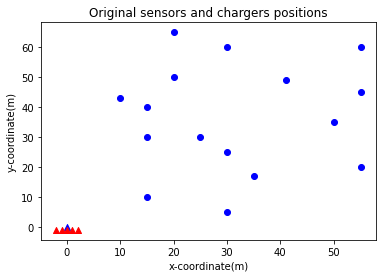

In [41]:
# Figure 1 Original WRSN sensor node and charger Wireless radar sensor network
plt.figure()
plt.scatter(X[1:], Y[1:], marker='o', color='blue')
plt.scatter(X[0], Y[0], marker='^', color='blue')
plt.xlabel('x-coordinate(m)')
plt.ylabel('y-coordinate(m)')
for i in range(no_of_vehicles):
    plt.scatter(X[0] - 2 + i, Y[0] - 1, marker='^', color='red')
plt.title('Original sensors and chargers positions')


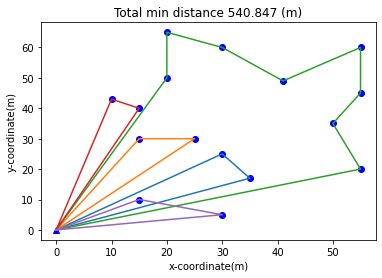

In [42]:
# Figure 2 Trajectory after MTSP solution
plt.figure()
plt.scatter(X[1:], Y[1:], marker='o', color='blue')
plt.scatter(X[0], Y[0], marker='^', color='blue')
plt.xlabel('x-coordinate(m)')
plt.ylabel('y-coordinate(m)')
plt.title('Total min distance %g (m)' % m.objVal)
# plt.plot([XX1, XX2], [YY1, YY2])
for index in all_routes:
    route_list = all_routes[index]
    x = []
    y = []
    for i in route_list:
        x.append(X[i])
        y.append(Y[i])
    plt.plot(x, y)
plt.show()